In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (15,6)

In [2]:
data = pd.read_csv('ALL_MONTHS_FINAL.csv')
data = data.iloc[:,1:]
data = data.set_index('period')

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data = data.drop(['Year','Month','Day','Hour'], axis= 1)

In [5]:
data = data.resample('D').max()

In [6]:
AP = data.loc[:,['AP']]
C6 = data.loc[:,['C6']]
CO = data.loc[:,['CO']]
NO = data.loc[:,['NO']]
NO2 = data.loc[:,['NO2']]
NOX = data.loc[:,['NOX']]
O3 = data.loc[:,['O3']]
PM10 = data.loc[:,['PM10']]
PM25 = data.loc[:,['PM25']]
RF = data.loc[:,['RF']]
RH = data.loc[:,['RH']]
RT = data.loc[:,['RT']]
SO2 = data.loc[:,['SO2']]
SR = data.loc[:,['SR']]
TOL = data.loc[:,['TOL']]
WD = data.loc[:,['WD']]
WS = data.loc[:,['WS']]
XYL = data.loc[:,['XYL']]

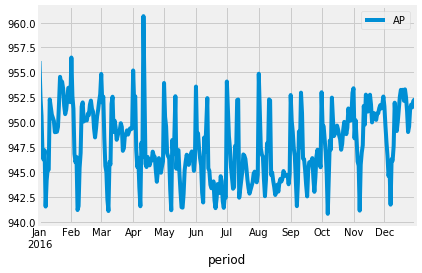

In [7]:
AP.plot()
plt.show()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
results = seasonal_decompose(AP['AP'])

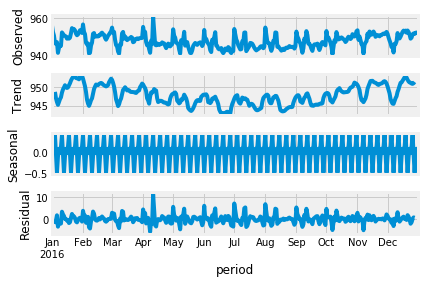

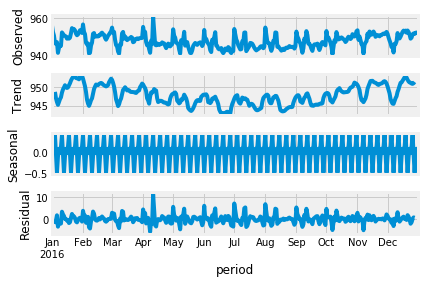

In [10]:
results.plot()

In [11]:
AP.shape

(366, 1)

In [12]:
train = PM10.iloc[:359]
test = PM10.iloc[359:]

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [18]:
scaled_train

array([[0.10079685],
       [0.08040612],
       [0.04930613],
       [0.02994321],
       [0.04043482],
       [0.03532404],
       [0.02943132],
       [0.01066896],
       [0.79978477],
       [0.0238006 ],
       [0.11876116],
       [0.12722942],
       [0.078282  ],
       [0.08251412],
       [0.08186519],
       [0.67067307],
       [0.04758104],
       [0.03885483],
       [0.05631532],
       [0.07928159],
       [0.08894693],
       [0.12531892],
       [0.12185665],
       [0.11423078],
       [0.07767339],
       [0.05387682],
       [0.07088185],
       [0.10821312],
       [0.11321105],
       [0.11894254],
       [0.08569425],
       [0.07102695],
       [0.08987396],
       [0.17623326],
       [0.06493271],
       [0.25652249],
       [0.83054215],
       [0.01858099],
       [0.0146149 ],
       [0.0204794 ],
       [0.01384506],
       [0.10659686],
       [0.15759584],
       [0.05306264],
       [0.065235  ],
       [0.79978477],
       [0.06878595],
       [0.085

In [19]:
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout

In [33]:
n_input = 7
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [34]:
hidden_nodes = int(2/3 * (n_input* n_features))
print("The number of hidden nodes is {}.".format(hidden_nodes))

The number of hidden nodes is 4.


In [66]:
#model = Sequential()

#model.add(LSTM(150, activation='relu', input_shape = (n_input, n_features)))
#model.add(Dense(1))
#model.compile(optimizer = 'adam', loss = 'mse')

# design network
model = Sequential()
model.add(LSTM(150, return_sequences=False, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 150)               91200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 151       
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit_generator(train_generator, epochs = 100)

Epoch 1/100
352/352 [==============================] - 10s 28ms/step - loss: 0.8455 - acc: 0.0028ETA: 3s - los
Epoch 2/100
352/352 [==============================] - 5s 15ms/step - loss: 0.8455 - acc: 0.0028: 1s - loss: 0. - ETA: 0s - loss: 0.8525
Epoch 3/100
352/352 [==============================] - 5s 15ms/step - loss: 0.8455 - acc: 0.0028: 0s - loss: 0.8411 - a
Epoch 4/100
352/352 [==============================] - 5s 15ms/step - loss: 0.8455 - acc: 0.0028
Epoch 5/100
352/352 [==============================] - 5s 15ms/step - loss: 0.8455 - acc: 0.0028
Epoch 6/100
352/352 [==============================] - 5s 15ms/step - loss: 0.8455 - acc: 0.0028
Epoch 7/100
352/352 [==============================] - 5s 15ms/step - loss: 0.8455 - acc: 0.0028
Epoch 8/100
352/352 [==============================] - 5s 15ms/step - loss: 0.8455 - acc: 0.0028: 0s - loss: 0.8526 - acc: 0.0 - ETA: 0s - loss: 0.8509 
Epoch 9/100
217/352 [=================>............] - ETA: 2s - loss: 0.8521 - acc: 0.0046

KeyboardInterrupt: 

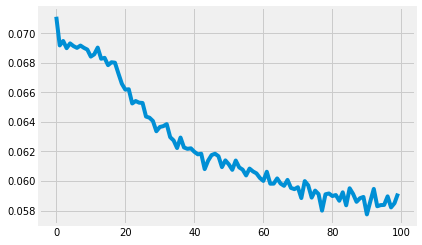

In [47]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [48]:
first_eval_batch = scaled_train[-7:]

In [49]:
first_eval_batch

array([[0.04475964],
       [0.03921355],
       [0.6730229 ],
       [0.67980637],
       [0.08643184],
       [0.09628259],
       [0.07730257]])

In [50]:
first_eval_batch = first_eval_batch.reshape((1,n_input, n_features))

In [51]:
model.predict(first_eval_batch)

array([[0.08320995]], dtype=float32)

In [52]:
#forecast
#holding prediction
test_prediction = []

#last n input points from the training set
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [53]:
true_predictions = scaler.inverse_transform(test_prediction)

In [54]:
true_predictions

array([[222.15637419],
       [238.58000977],
       [237.16355094],
       [213.98769141],
       [205.37266707],
       [200.74575062],
       [196.30423986]])

In [55]:
test['Predictions'] = true_predictions 

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
test

,PM10,Predictions
period,,
2016-12-25,191.54,222.156374
2016-12-26,186.11,238.580010
2016-12-27,172.15,237.163551
2016-12-28,192.15,213.987691
2016-12-29,219.95,205.372667
2016-12-30,235.02,200.745751
2016-12-31,255.98,196.304240


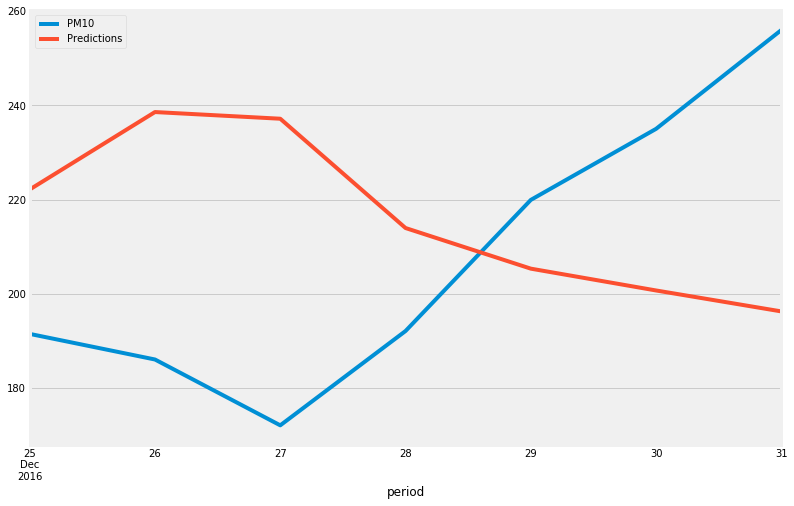

In [57]:
test.plot(figsize=(12,8))